<a href="https://colab.research.google.com/github/GTWFam/Group7_DS3010/blob/main/CaseStudy3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 3 : Textual analysis of movie reviews

**Due Date: February 22, 2020, BEFORE the beginning of class at 2:00pm ET**

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Jacob Bissonette
    Austin Franklin 
    Yuriy Kamenivskyy 
    Garrett McMerriman
    Bill Hoang Pham

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the tutorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* In particular, this case study is quite similar to "Exercise 2: Sentiment Analysis on movie reviews" on the above web page.
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org).
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Getting the data onto Colab example.

In [3]:
! wget https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2022-02-22 15:15:32--  https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  15.4MB/s    in 0.2s    

2022-02-22 15:15:33 (15.4 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



Look for the directory txt_sentoken

In [4]:
! tar xzf review_polarity.tar.gz
! ls

poldata.README.2.0  review_polarity.tar.gz  sample_data  txt_sentoken


## Problem 1 (10 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Installing scikit-learn using Anaconda does not necessarily download the example source-code.
* Accordingly, you may need to download these directly from Github at https://github.com/scikit-learn/scikit-learn:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* Here is a direct link to the code to help you out:  https://github.com/scikit-learn/scikit-learn/tree/main/doc/tutorial/text_analytics
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involve moving around data files and/or small modifications to the script.

In [5]:
# Imports

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
# Data Load

movie_reviews_data_folder = "/content/txt_sentoken"
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [7]:
# Training and Testing split
 
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.01
              precision    recall  f1-score   support

         neg       0.85      0.84      0.84       251
         pos       0.84      0.85      0.84       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



Text(33.0, 0.5, 'Actual')

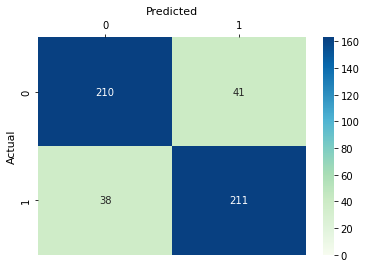

In [ ]:
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', SVC(C=1000)),
    ])

parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))
    
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True,fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

## Problem 2 (10 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.75; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.75; std - 0.02
2 params - {'vect__ngram_range': (3, 3)}; mean - 0.56; std - 0.01
              precision    recall  f1-score   support

         neg       0.75      0.75      0.75       251
         pos       0.75      0.74      0.75       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

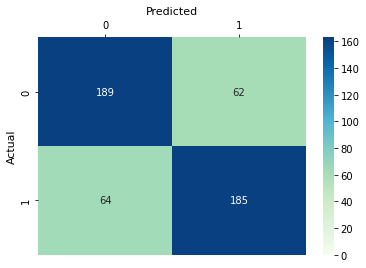

In [ ]:
# min is 1/4 of 1500 which train and max is 3/4 of 1500
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=0.25, max_df=0.75)),
        ('clf', SVC(C=1000)),
    ])

parameters = {
        'vect__ngram_range': [(1, 1), (1, 2), (3, 3)],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))
    
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True,fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

## Problem 3 (15 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

## Linear SVC

The linear SVC works well, since the optimal seperation line will most likely result the similar number of false positive and false negative values on the each side of the line. We experiment with the regularization parametor since its value "controls the trade off between smooth decision boundary and classifying training points correctly."
https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
Which means that high value of parametor would overfit the training data, so we changed our C from 100 to 1 which gave us best testing accuracy.

              precision    recall  f1-score   support

         neg       0.78      0.81      0.80       251
         pos       0.80      0.78      0.79       249

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



Text(33.0, 0.5, 'Actual')

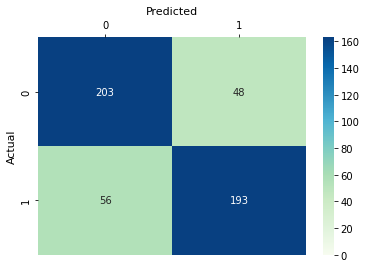

In [ ]:
vectorizer = TfidfVectorizer(min_df=0.10, max_df=0.90, ngram_range=(1,2))
Xtrain = vectorizer.fit_transform(docs_train)
Xtest = vectorizer.transform(docs_test)

svc_clf = LinearSVC(C=1, max_iter=5000)

model = svc_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

# vectorizer = TfidfVectorizer(min_df=1, max_df=0.95, ngram_range=(1,2))
# X = vectorizer.fit_transform(dataset.data)

# print("Testing c variable for SVC.")
# svc_clf = LinearSVC(C=1, max_iter = 5000)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with c=1, min_df = 1 max_df=.95: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))

# svc_clf = LinearSVC(C=10, max_iter = 5000)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with c=10, min_df = 1, max_df=.95: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))

# svc_clf = LinearSVC(C=100, max_iter = 5000)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with c=100, min_df = 1, max_df=.95: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))
# print("C = 10 is the best parameter for the model. It is the standard for future testing.")

# print("Testing min_df variable for SVC.")
# vectorizer = TfidfVectorizer(min_df=.01, max_df=0.95, ngram_range=(1,2))
# X = vectorizer.fit_transform(dataset.data)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with min_df = .01, max_df=.95: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))

# vectorizer = TfidfVectorizer(min_df=.05, max_df=0.95, ngram_range=(1,2))
# X = vectorizer.fit_transform(dataset.data)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with min_df= .05, max_df=.95: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))
# print("Min_df = 1 is the best parameter for the model. It is the standard for future testing.")

# print("Testing max_df variable for SVC.")
# vectorizer = TfidfVectorizer(min_df=1, max_df=0.8, ngram_range=(1,2))
# X = vectorizer.fit_transform(dataset.data)
# svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
# print("Cross-validation of SVC model with max_df = .8: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))

vectorizer = TfidfVectorizer(min_df=1, max_df=0.75, ngram_range=(1,2))
X = vectorizer.fit_transform(dataset.data)
svc_clf = LinearSVC(C=10, max_iter = 5000)
svc_cv_scores = cross_val_score(svc_clf, X, dataset.target, cv=4)
print("Cross-validation of SVC model: %0.3f accuracy with a standard deviation of %0.3f" % (svc_cv_scores.mean(), svc_cv_scores.std()))
print("We found that the most important parameter in the model is the min_df. Followed by max_df. And lastly by c.")
print("The optimal model has min_df of 1, max_df of around .7-.75 and c of 10.")

Cross-validation of SVC model: 0.869 accuracy with a standard deviation of 0.009
We found that the most important parameter in the model is the min_df. Followed by max_df. And lastly by c.
The optimal model has min_df of 1, max_df of around .7-.75 and c of 10.


## KNN Classefier
The false positive is increasing as the number of neighbours are increasing. Even though the small number of neighbours result in similar number of errors, it produces a weak accuracy. Therefore, we tried to change the dimension of the vector because knn works better with smaller dimensions.

              precision    recall  f1-score   support

         neg       0.76      0.55      0.64       257
         pos       0.63      0.82      0.71       243

    accuracy                           0.68       500
   macro avg       0.70      0.69      0.68       500
weighted avg       0.70      0.68      0.68       500



Text(33.0, 0.5, 'Actual')

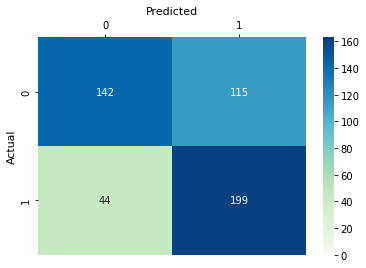

In [12]:
from sklearn.neighbors import KNeighborsClassifier

vectorizer = TfidfVectorizer(min_df=0.10, max_df=0.90, ngram_range=(1,2))
Xtrain = vectorizer.fit_transform(docs_train)
Xtest = vectorizer.transform(docs_test)

knn_clf = KNeighborsClassifier(n_neighbors=50)

model = knn_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

              precision    recall  f1-score   support

         neg       0.84      0.62      0.71       257
         pos       0.69      0.87      0.77       243

    accuracy                           0.74       500
   macro avg       0.76      0.75      0.74       500
weighted avg       0.76      0.74      0.74       500



Text(33.0, 0.5, 'Actual')

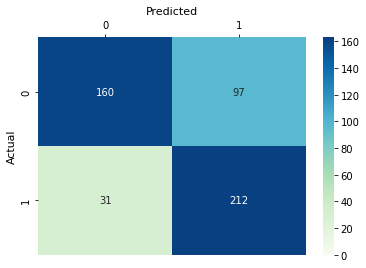

In [15]:
vectorizer = TfidfVectorizer(min_df=1, max_df=0.70, ngram_range=(1,2))
Xtrain = vectorizer.fit_transform(docs_train)
Xtest = vectorizer.transform(docs_test)

knn_clf = KNeighborsClassifier(n_neighbors=50)

model = knn_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
print("Determining best k-nearest value through 4-fold cross validation.")
# knn_clf = KNeighborsClassifier(n_neighbors=10)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 10: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

# knn_clf = KNeighborsClassifier(n_neighbors=50)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 50: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

# knn_clf = KNeighborsClassifier(n_neighbors=100)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 100: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

# knn_clf = KNeighborsClassifier(n_neighbors=200)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 200: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

# knn_clf = KNeighborsClassifier(n_neighbors=400)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 400: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

# knn_clf = KNeighborsClassifier(n_neighbors=700)
# knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
# print("kn = 700: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

knn_clf = KNeighborsClassifier(n_neighbors=600)
knn_cv_scores = cross_val_score(knn_clf, X, dataset.target, cv=4)
print("kn = 600: %0.3f accuracy with a standard deviation of %0.3f" % (knn_cv_scores.mean(), knn_cv_scores.std()))

print("Most accurate knn model is achieved at n = 600.")

Determining best k-nearest value through 4-fold cross validation.
kn = 600: 0.802 accuracy with a standard deviation of 0.026
Most accurate knn model is achieved at n = 600.


## Problem 4 (15 points): Use a Multi-Layer Perceptron (MLP) for classifying the reviews.  Explore the parameters for the MLP and compare the accuracies against your baseline algorithms in Problem 1.

**Read the documentation for the MLPClassifier class at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.** 
* Note: This is *very similar* to using the LinearSVC and KNeighborsClassifier classes above!
* Try different values for "hidden_layer_sizes".  What do you observe in terms of accuracy?
* Try different values for "activation". What do you observe in terms of accuracy?


In [24]:
vectorizer = TfidfVectorizer(min_df=1, max_df=0.70, ngram_range=(1,2))
Xtrain = vectorizer.fit_transform(docs_train)
Xtest = vectorizer.transform(docs_test)

              precision    recall  f1-score   support

         neg       0.89      0.85      0.87       257
         pos       0.85      0.89      0.87       243

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



Text(33.0, 0.5, 'Actual')

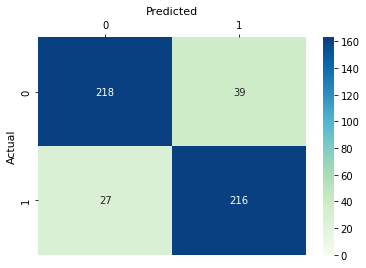

In [25]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=500)

model = mlp_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

         neg       0.88      0.86      0.87       257
         pos       0.85      0.88      0.87       243

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



Text(33.0, 0.5, 'Actual')

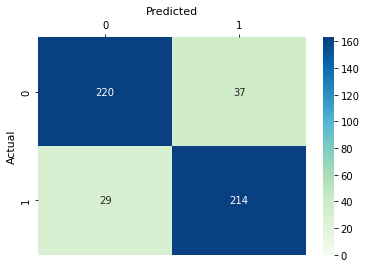

In [26]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), random_state=1, max_iter=300)

model = mlp_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

              precision    recall  f1-score   support

         neg       0.73      0.73      0.73       251
         pos       0.73      0.73      0.73       249

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.73      0.73      0.73       500



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(33.0, 0.5, 'Actual')

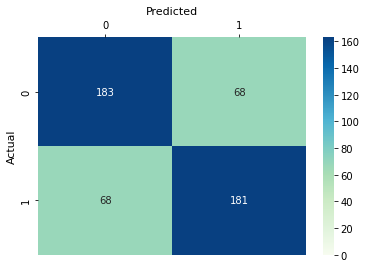

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,),random_state=1, max_iter=500)

model = mlp_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

              precision    recall  f1-score   support

         neg       0.76      0.75      0.75       251
         pos       0.75      0.76      0.76       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

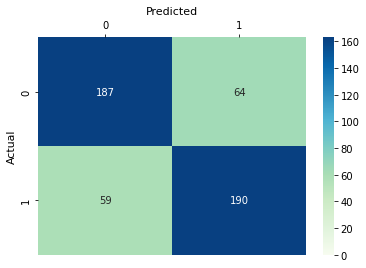

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=750, activation='logistic')

model = mlp_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

              precision    recall  f1-score   support

         neg       0.76      0.75      0.75       251
         pos       0.75      0.76      0.75       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

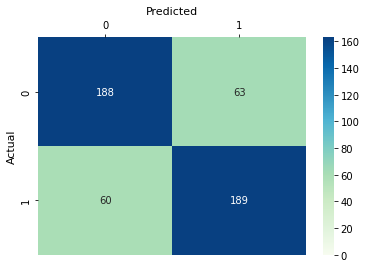

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=750, activation='tanh')

model = mlp_clf.fit(Xtrain, y_train)
y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, max_iter=750, activation='tanh', hidden_layer_sizes=(50,))

mlp_cv_scores = cross_val_score(mlp_clf, X, dataset.target, cv=4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (mlp_cv_scores.mean(), mlp_cv_scores.std()))

0.81 accuracy with a standard deviation of 0.01


## Problem 5 (10 points): Accuracy is not everything!  How fast are the algorithms versus their accuracy?
**Compare the runtime of your  baseline algorithms to the runtime of the MLPClassifier** 

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* Try different values for "hidden_layer_sizes".  What do you observe in terms of runtime?
* Try different values for "activation". What do you observe in terms of runtime?
* How long does the "fit" function take as opposed to the "predict" function?  Can you explain why?

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

1 loop, best of 5: 21.5 s per loop
100 loops, best of 5: 6.27 ms per loop
              precision    recall  f1-score   support

         neg       0.76      0.75      0.75       251
         pos       0.75      0.76      0.75       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

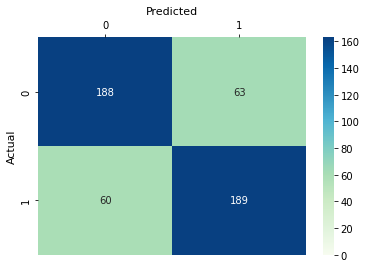

In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=500)

%timeit model = mlp_clf.fit(Xtrain, y_train)
%timeit y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

1 loop, best of 5: 26.7 s per loop
100 loops, best of 5: 6.29 ms per loop
              precision    recall  f1-score   support

         neg       0.76      0.75      0.75       251
         pos       0.75      0.76      0.75       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

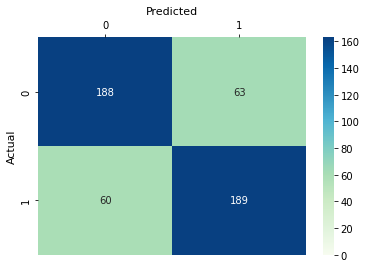

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), random_state=1, max_iter=500)

%timeit model = mlp_clf.fit(Xtrain, y_train)
%timeit y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reac

The slowest run took 9.45 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 2.73 s per loop
100 loops, best of 5: 6.45 ms per loop
              precision    recall  f1-score   support

         neg       0.76      0.75      0.75       251
         pos       0.75      0.76      0.75       249

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



Text(33.0, 0.5, 'Actual')

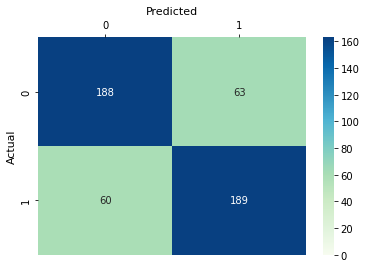

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), random_state=1, max_iter=500)

%timeit model = mlp_clf.fit(Xtrain, y_train)
%timeit y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), random_state=1, max_iter=1000, activation='logistic')

%timeit model = mlp_clf.fit(Xtrain, y_train)
%timeit y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_p

The slowest run took 13.36 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 256 ms per loop


KeyboardInterrupt: ignored

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), random_state=1, max_iter=500, activation='tanh')

%timeit model = mlp_clf.fit(Xtrain, y_train)
%timeit y_predicted = model.predict(Xtest)

print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

cm = metrics.confusion_matrix(y_test, y_predicted)
x = sns.heatmap(cm, vmin=0, vmax=163, annot=True, fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', size=11)


## Problem 6 (20 points): Business question

* Suppose you had a machine learning algorithm that could detect the sentiment of tweets that was highly accurate.  What kind of business could you build around that?
* Who would be your competitors, and what are their sizes?
* What would be the size of the market for your product?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data.  How would that affect your business plan?
* How could you use the cloud to support your product?

#Problem 6

###1. What business?
We decided to continue with the business we designed in CS2. Our business model lies in the creation of a tool that can be used by businesses to design a perfect "disruptive" product. 

##ASSUMPTION: the assumption is that twitter is actually a good platform for product analysis but it isn't. For example, if we were doing CS2 again, to analyze people sentiment about restaurants we would use Yelp. If we do phone analysis we will use a site that specializes in reviewing technology. If we do product reviews we would use a massive retailer site and analyze reviews there. But, since we have to use twitter, let's just imagine it is actually good for product analysis. At the end of the day, the model is transferrable to any sort of platform with text reviews.

We collect sentiment of people about a particular topic, relevant to the new business, and then analyze the positive and negative tweets to determine any important stake features the newcoming product must have, or any breakthrough features it has to include to beat the competition. E.g. if the newcomer wants to start a phone business, we collect tweets about phones. Look for positive tweets and negative tweets. Then look for common features (most common words) among negative tweets and then common features (most common words) among positive tweets.
Perhaps, it is important to note that we would have to perform a more accurate n-gram selection to amke this work. We would have to only look for subject - action (SA) and action - object (AO) n-gram pairs, which is achieved by first filtering the stopwords and then applying SOME business acumen and human intelligence to determine common actions performed with the given product. There is, however, potential for improvement of the business model to automatically identify key action words itself.

###2. Who's the competitors?
Our competition is consulting firms. They have massive sizes and departments but they charge more money for the services and their approach is based on interviews / business model analysis and other legacy ways of doing consulting. Our consulting approach is done purely with the help of Big Data analysis, which makes it quicker, cheaper, and more empirically accurate.

###3. Size of the market?
We would begin with targeting ventures that are a part of the StartUp Worcester cohort. The size of this market is about 10 new companies each year. These are usually new, up and coming companies that cannot afford standard consulting services but certainly need help with market penetration with their new product. Importantly, they need to penetrate the market with a disruptive design, since developing a product that is just "marginally" better than competition, won't help them gain market share against established big firms.

###4. ML training is slow but testing is quick.
That wouldn't really influence our business model. The standard consulting time is going to be longer anyway and our end result depends on the accuraccy of our testing results. The key is training here, since we are using deep learning to perform a consultant's job, so maybe long training times would even further emphasize the benefit and complexity of our approach to the customer and allow us to charge them even more.

###5. Cloud to support product.
We would want to gather customer reviews into the cloud most likely. This would allow us to aggreggate large amounts of data into logical groups e.g. twitter data, yelp data, google review data, amazon data, etc. and overcome the limitations of free API (limited number of calls in a time period) by aggreggating calls across several months.

# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through canvas.wpi.edu

### DS3010 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80


    -----------------------------------
    Question 1:
    Points: 10
    -----------------------------------
    
    -----------------------------------
    Question 2:
    Points: 10
    -----------------------------------
        
    -----------------------------------
    Question 3:
    Points: 15 
    -----------------------------------
  
    -----------------------------------
    Question 4:  
    Points: 15
    -----------------------------------

    -----------------------------------
    Question 5:  
    Points: 10
    -----------------------------------

    -----------------------------------
    Question 6:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
